#### Comparing Classifiers : 

Data:
The dataset you will use comes from the UCI Machine Learning repository Links to an external site.. The data is from a Portuguese banking institution and is a collection of the results of multiple marketing campaigns. You can make use of the article Links to an external site. accompanying the dataset (in the .zip file) for more information on the data and features.

Deliverables:
After understanding, preparing, and modeling your data, build a Jupyter Notebook that includes a clear statement demonstrating your understanding of the business problem, a correct and concise interpretation of descriptive and inferential statistics, your findings (including actionable insights), and next steps and recommendations.

#### Data Description
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score

In [2]:
data = pd.read_csv('data/bank-additional-full.csv',sep='[;]')

/var/folders/r4/l04k94616gg5y_19vs3yw5j40000gq/T/ipykernel_4742/3653081229.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('data/bank-additional-full.csv',sep='[;]')


In [3]:
data.head()

,"""age""","""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""",...,"""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   "age"             41188 non-null  int64  
 1   "job"             41188 non-null  object 
 2   "marital"         41188 non-null  object 
 3   "education"       41188 non-null  object 
 4   "default"         41188 non-null  object 
 5   "housing"         41188 non-null  object 
 6   "loan"            41188 non-null  object 
 7   "contact"         41188 non-null  object 
 8   "month"           41188 non-null  object 
 9   "day_of_week"     41188 non-null  object 
 10  "duration"        41188 non-null  int64  
 11  "campaign"        41188 non-null  int64  
 12  "pdays"           41188 non-null  int64  
 13  "previous"        41188 non-null  int64  
 14  "poutcome"        41188 non-null  object 
 15  "emp.var.rate"    41188 non-null  float64
 16  "cons.price.idx"  41188 non-null  float6

In [5]:
num_na = pd.DataFrame({'num_na':data.isna().sum(),'%':data.isna().sum()/len(data)})
num_na

,num_na,%
"""age""",0,0.0
"""job""",0,0.0
"""marital""",0,0.0
"""education""",0,0.0
"""default""",0,0.0
"""housing""",0,0.0
"""loan""",0,0.0
"""contact""",0,0.0
"""month""",0,0.0
"""day_of_week""",0,0.0


In [6]:
data.columns = [col[1:-1] for col in data.columns]

In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,"""housemaid""","""married""","""basic.4y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
2,37,"""services""","""married""","""high.school""","""no""","""yes""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
4,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""


<Axes: xlabel='default', ylabel='count'>

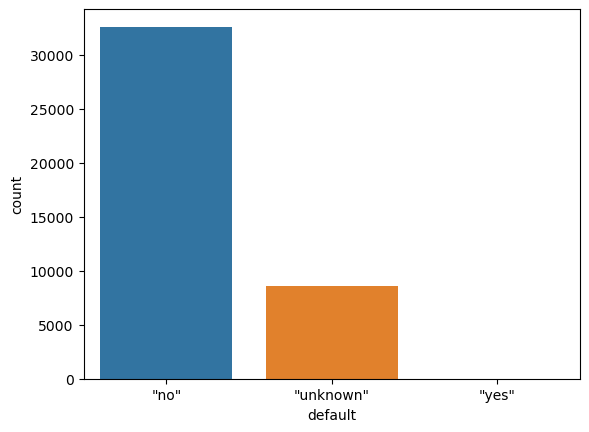

In [8]:
sns.countplot(data, x='default')


<Axes: xlabel='default', ylabel='count'>

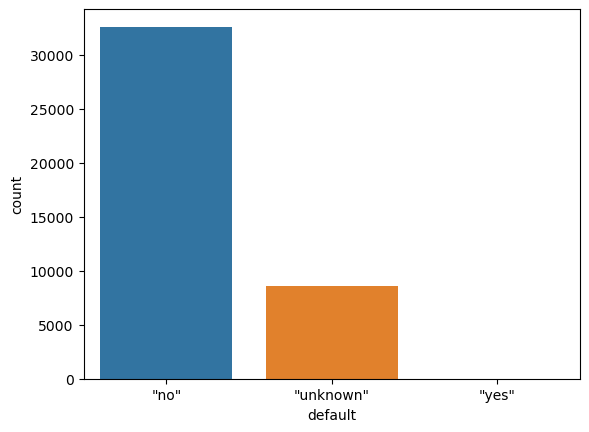

In [9]:
sns.countplot(data, x='default')

<Axes: xlabel='marital', ylabel='count'>

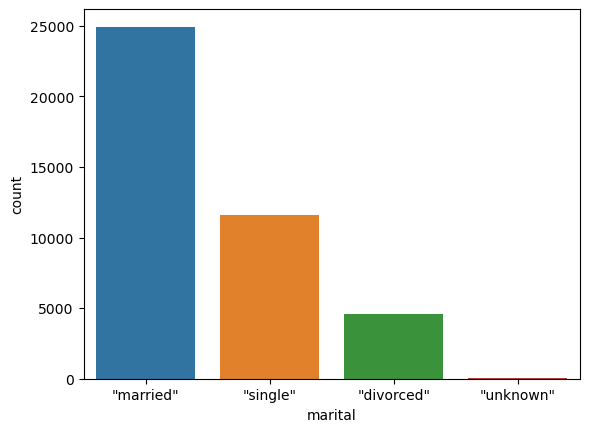

In [10]:
sns.countplot(data, x='marital')

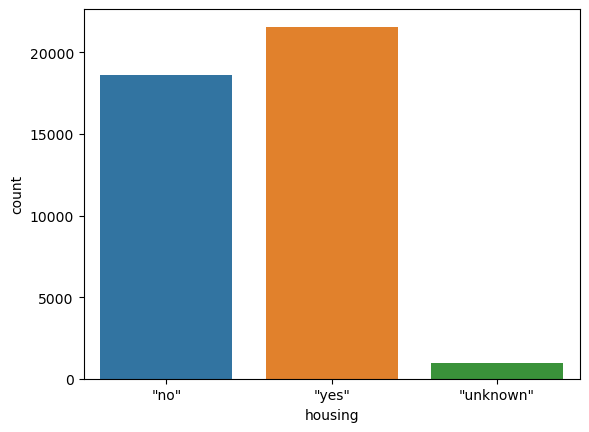

In [11]:
sns.countplot(data, x='housing')
data['housing'].replace('"yes"', "1", inplace=True)
data['housing'].replace('"no"', "0", inplace=True)
data['housing'].replace('"unknown"', "2", inplace=True)

<Axes: xlabel='housing', ylabel='count'>

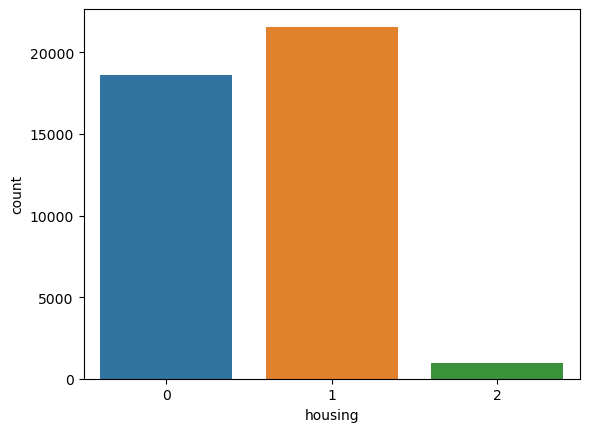

In [12]:
sns.countplot(data, x='housing')

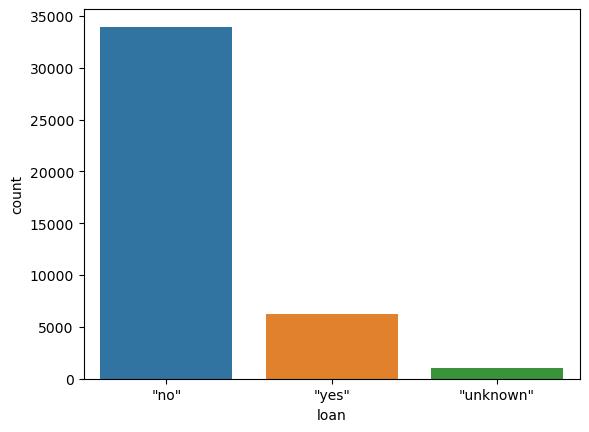

In [13]:
sns.countplot(data, x='loan')
data['loan'].replace('"yes"', "1", inplace=True)
data['loan'].replace('"no"', "0", inplace=True)
data['loan'].replace('"unknown"', "2", inplace=True)

<Axes: xlabel='loan', ylabel='count'>

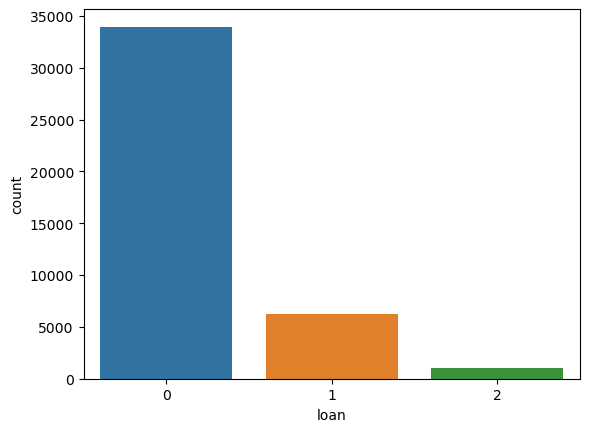

In [14]:
sns.countplot(data, x='loan')

In [15]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<Axes: xlabel='poutcome', ylabel='count'>

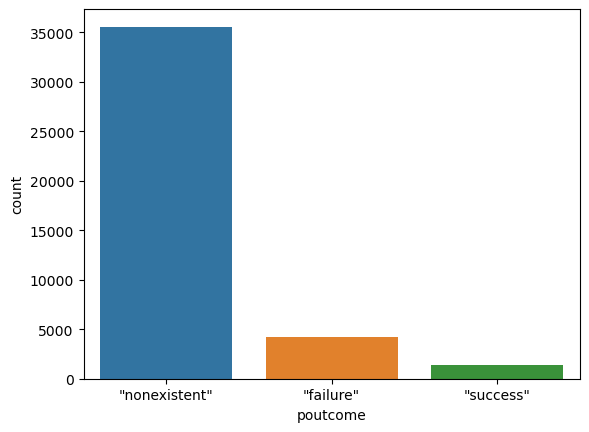

In [17]:
sns.countplot(data, x='poutcome')

In [18]:
data.head(100)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,"""housemaid""","""married""","""basic.4y""","""no""",0,0,"""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
1,57,"""services""","""married""","""high.school""","""unknown""",0,0,"""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
2,37,"""services""","""married""","""high.school""","""no""",1,0,"""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
3,40,"""admin.""","""married""","""basic.6y""","""no""",0,0,"""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
4,56,"""services""","""married""","""high.school""","""no""",0,1,"""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,"""services""","""married""","""professional.course""","""no""",1,0,"""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
96,42,"""management""","""married""","""university.degree""","""no""",0,0,"""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
97,53,"""admin.""","""divorced""","""university.degree""","""unknown""",0,0,"""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""
98,37,"""technician""","""single""","""professional.course""","""no""",0,0,"""telephone""","""may""","""mon""",...,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191.0,"""no"""


<Axes: xlabel='pdays', ylabel='count'>

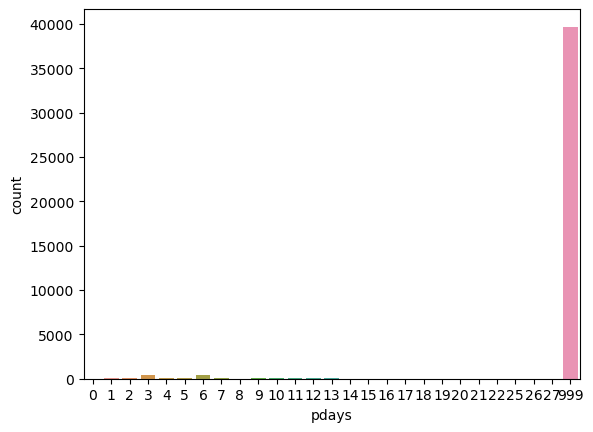

In [19]:
sns.countplot(data, x='pdays')

<Axes: xlabel='day_of_week', ylabel='count'>

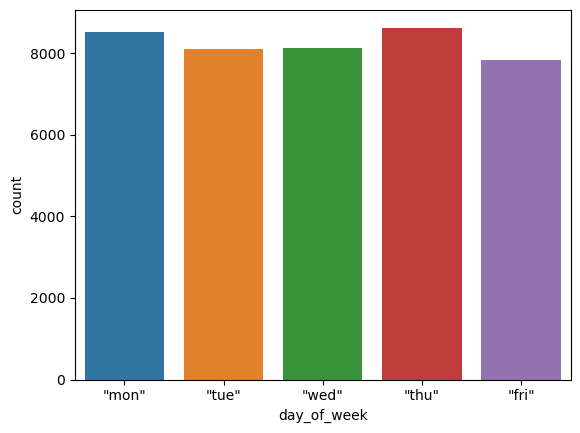

In [20]:
sns.countplot(data, x='day_of_week')

In [21]:
data=data.replace(to_replace=['"mon"', '"tue"', '"wed"', '"thu"', '"fri"'], value=[1, 2, 3, 4, 5])

<Axes: xlabel='contact', ylabel='count'>

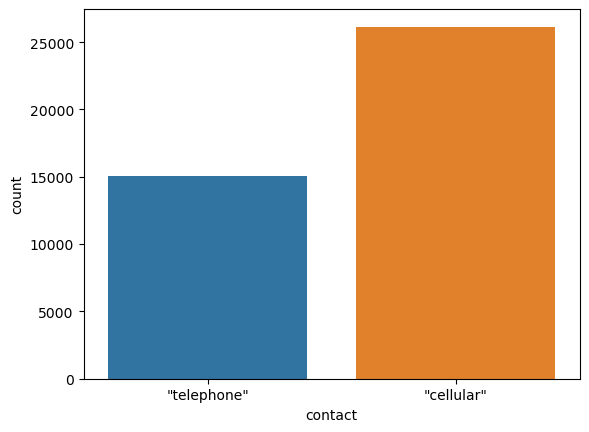

In [22]:
sns.countplot(data, x='contact')

In [23]:
data=data.replace(to_replace=['"telephone"', '"cellular"'], value=[1, 2])

<Axes: xlabel='month', ylabel='count'>

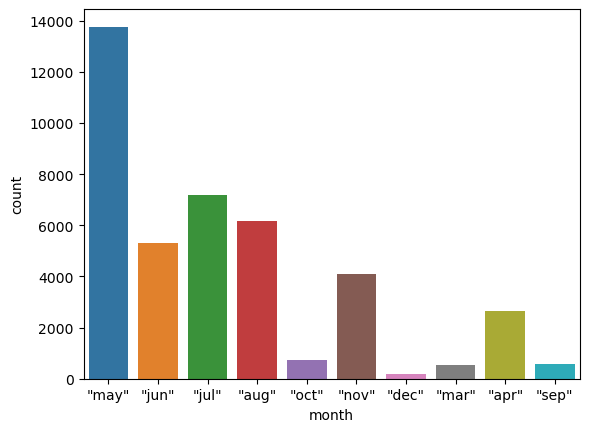

In [24]:
sns.countplot(data, x='month')

In [25]:
data=data.replace(to_replace=['"jan"', '"feb"', '"mar"', '"apr"','"may"', '"jun"', '"jul"', '"aug"', '"sep"', '"oct"', '"nov"', '"dec"'], value=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

<Axes: xlabel='poutcome', ylabel='count'>

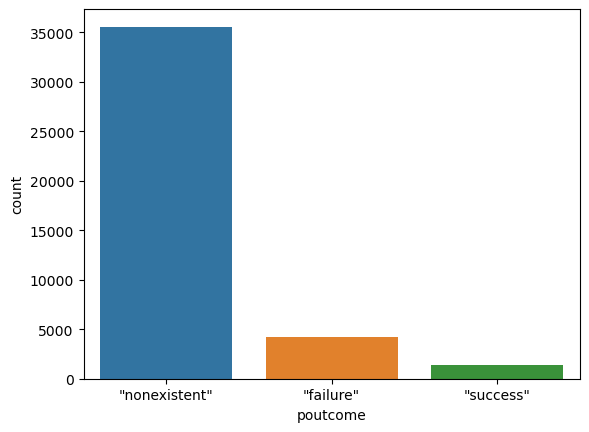

In [26]:
sns.countplot(data, x='poutcome')

In [27]:
data=data.replace(to_replace=['"nonexistent"', '"failure"', '"success"'], value=[1, 2, 3])

<Axes: xlabel='marital', ylabel='count'>

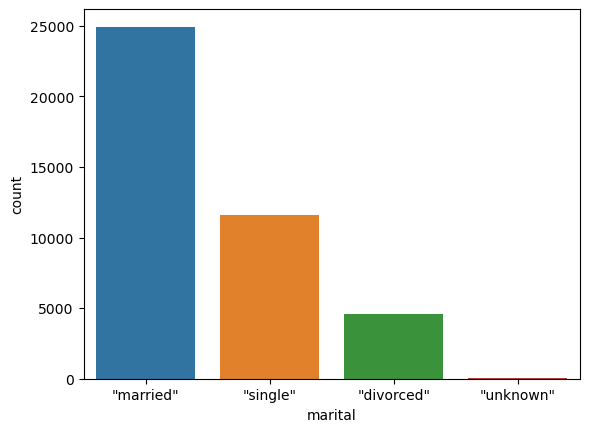

In [28]:
sns.countplot(data, x='marital')

In [29]:
data=data.replace(to_replace=['"married"', '"single"', '"divorced"', '"unknown"'], value=[1, 2, 3, 4])

<Axes: xlabel='education', ylabel='count'>

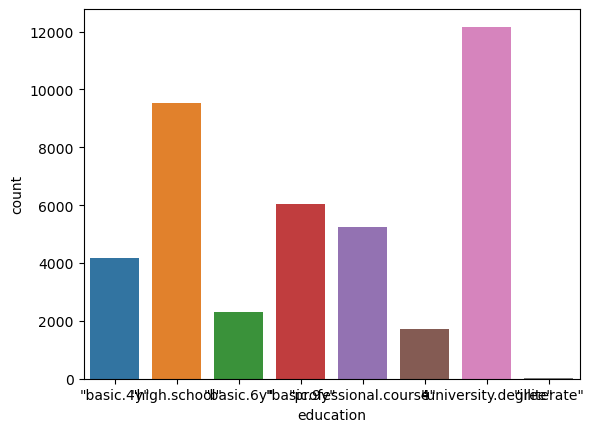

In [30]:
sns.countplot(data, x='education')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [32]:
data['job'].unique()

array(['"housemaid"', '"services"', '"admin."', '"blue-collar"',
       '"technician"', '"retired"', '"management"', '"unemployed"',
       '"self-employed"', 4, '"entrepreneur"', '"student"'], dtype=object)

In [33]:
data['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  3,  4,  9])

<Axes: xlabel='y', ylabel='count'>

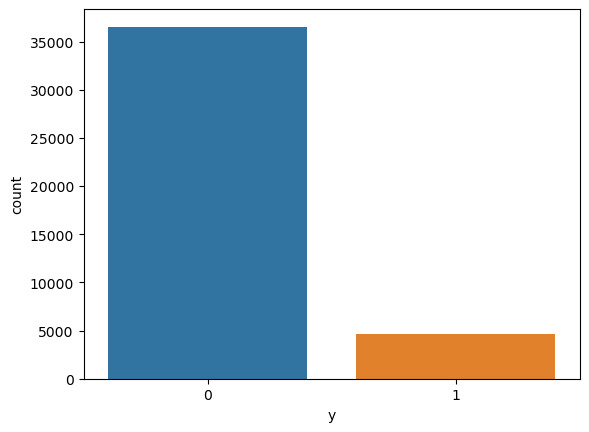

In [34]:
sns.countplot(data, x='y')
data=data.replace(to_replace=['"yes"', '"no"', '"unkonwn"'], value=[1, 0, -1])
sns.countplot(data, x='y')

# Data Preparation

The dataset is clean with zero nans or missing values.
Renamed the column names to remove the quotation marks.
Replaced boolean or simple categorical columns with numeric values wherever possible.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  object 
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [36]:
X_selected= data[['default', 'housing', 'loan', 'duration', 'age', 'job', 'marital']]
y=data['y']
X=pd.get_dummies(X_selected)

In [37]:
X

,default,duration,age,marital,housing_0,housing_1,housing_2,loan_0,loan_1,loan_2,...,"job_""blue-collar""","job_""entrepreneur""","job_""housemaid""","job_""management""","job_""retired""","job_""self-employed""","job_""services""","job_""student""","job_""technician""","job_""unemployed"""
0,0,261,56,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,4,149,57,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,226,37,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,151,40,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,307,56,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,334,73,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
41184,0,383,46,1,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
41185,0,189,56,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
41186,0,442,44,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [38]:
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [39]:
#split into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [40]:
# Scaling the data
standardScaler = StandardScaler()
X_train=standardScaler.fit_transform(X_train)
X_test=standardScaler.fit_transform(X_test)

In [41]:
# Train different Classification models
#Use Logistic Regression
logistic_reg = LogisticRegression(random_state=32)
#Use Support Vector Machine classifier
svc=SVC(kernel='linear', random_state=32)
#Use Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=32)
#KNN
knn_pipe_5 = Pipeline([('scale', StandardScaler()), 
                      ('model', KNeighborsClassifier(n_neighbors=5))])

In [42]:
#Fit the models with the training data
logistic_reg.fit(X_train, y_train)
svc.fit(X_train, y_train)
decision_tree.fit(X_train,y_train)
knn_pipe_5.fit(X_train, y_train)


Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsClassifier())])

In [45]:
# Evaluate different models using the Test dataset 
logistic_cm=confusion_matrix(y_test, logistic_reg.predict(X_test))
svc_cm=confusion_matrix(y_test, svc.predict(X_test))
knn_cm=confusion_matrix(y_test, knn_pipe_5.predict(X_test))
decision_cm=confusion_matrix(y_test, decision_tree.predict(X_test))


In [46]:
print(logistic_cm)

[[7183  120]
 [ 745  190]]


In [47]:
print(svc_cm)

[[7303    0]
 [ 935    0]]


In [48]:
print(knn_cm)

[[7060  243]
 [ 703  232]]


In [49]:
print(decision_cm)

[[6626  677]
 [ 605  330]]


In [50]:
logistic_accuracy=(logistic_cm[0][0] + logistic_cm[1][1])/len(y_test)

In [51]:
print('Logistic Regression Accuracy is ', logistic_accuracy*100, '%')

Logistic Regression Accuracy is  89.49987861131342 %


In [52]:
svc_accuracy=(svc_cm[0][0] + svc_cm[1][1])/len(y_test)
print('SVC Accuracy is ', svc_accuracy*100, '%')

SVC Accuracy is  88.65015780529255 %


In [53]:
decision_accuracy=(decision_cm[0][0] + decision_cm[1][1])/len(y_test)
print('Decision Tree Regression Accuracy is ', decision_accuracy*100, '%')

Decision Tree Regression Accuracy is  84.43797038116048 %


In [55]:
knn_accuracy=(knn_cm[0][0] + knn_cm[1][1])/len(y_test)
print('KNN Accuracy is ', knn_accuracy*100, '%')

KNN Accuracy is  88.51663025006069 %
